In [14]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#get files from cleaned data
players = pd.read_csv('players.csv', index_col='Unnamed: 0')
coaches = pd.read_csv('coaches.csv', index_col='Unnamed: 0')
champions = pd.read_csv('champions.csv', index_col='Unnamed: 0')

In [16]:
print(players.shape)
players.head()

(6371, 32)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Champ,Runner-Up
0,Arron Afflalo,SG,24.0,DEN,82.0,75.0,27.1,3.3,7.1,0.465,...,3.1,1.7,0.6,0.4,0.9,2.7,8.8,2010,0,0
1,Alexis Ajinça,C,21.0,CHA,6.0,0.0,5.0,0.8,1.7,0.500,...,0.7,0.0,0.2,0.2,0.3,0.8,1.7,2010,0,0
2,LaMarcus Aldridge,PF,24.0,POR,78.0,78.0,37.5,7.4,15.0,0.495,...,8.0,2.1,0.9,0.6,1.3,3.0,17.9,2010,0,0
3,Joe Alexander,SF,23.0,CHI,8.0,0.0,3.6,0.1,0.8,0.167,...,0.6,0.3,0.1,0.1,0.0,1.1,0.5,2010,0,0
4,Malik Allen,PF,31.0,DEN,51.0,3.0,8.9,0.9,2.3,0.397,...,1.6,0.3,0.2,0.1,0.4,1.3,2.1,2010,0,0


In [17]:
print(coaches.shape)
coaches.head()

(332, 26)


,Coach,Team,F-Seasons,Car-Seasons,CR-G,CR-W,CR-L,FR-G,FR-W,FR-L,...,CP-L,FP-G,FP-W,FP-L,Car.P-G,Car.P-W,Car.P-L,Year,Champ,Runner-Up
0,Mike Woodson,ATL,6,6,82,53,29,492,206,286,...,7.0,29.0,11.0,18.0,29.0,11.0,18.0,2010,0,0
1,Doc Rivers,BOS,6,11,82,50,32,492,280,212,...,9.0,71.0,41.0,30.0,86.0,46.0,40.0,2010,0,1
2,Larry Brown,CHA,2,29,82,44,38,164,79,85,...,4.0,4.0,0.0,4.0,235.0,120.0,115.0,2010,0,0
3,Vinny Del Negro,CHI,2,2,82,41,41,164,82,82,...,4.0,12.0,4.0,8.0,12.0,4.0,8.0,2010,0,0
4,Mike Brown,CLE,5,5,82,61,21,410,272,138,...,5.0,71.0,42.0,29.0,71.0,42.0,29.0,2010,0,0


In [18]:
#Descriptive statistics
players.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Champ',
       'Runner-Up'],
      dtype='object')

In [19]:
#list of numerical and categorical features
player_num_features = ['Age', 'G', 'GS','MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',                         '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',                        'TOV', 'PF','PTS']
player_cat_features = ['Player', 'Pos', 'Tm', 'Year', 'Champ', 'Runner-Up']

# Players 

## Exploring Null Values:
- There are players who are on the team, but haven't played games
- Some players entered a game, but didn't record a shot (minutes played != 0)
- There are players who won't have attempted two pointers or three pointers e.g. centers, some forwards
- Those who don't get to the free throw line

In [20]:
def get_null_columns(df):
    nulls = df.isnull().sum()
    for key, i in zip(list(nulls.keys()), nulls):
        if i > 0: print(key, '\t', i)

In [21]:
get_null_columns(players)

Age 	 237
G 	 237
GS 	 237
MP 	 237
FG 	 237
FGA 	 237
FG% 	 271
3P 	 237
3PA 	 237
3P% 	 1026
2P 	 237
2PA 	 237
2P% 	 309
eFG% 	 271
FT 	 237
FTA 	 237
FT% 	 540
ORB 	 237
DRB 	 237
TRB 	 237
AST 	 237
STL 	 237
BLK 	 237
TOV 	 237
PF 	 237
PTS 	 237


Note, the FG% and eFG% are missing 34 values --> these players did not attempt a shot, whether or not they played. Let's see if they played. Other observations:
- 237 players were rostered, but did not play any minutes of basketball for their teams
- 271-237 players recorded game minutes, but never attempted a shot in a game 
- 1026-237 players recorded minutes, but didn't attempt a three pointer
- 309-237 players recorded minutes, but didn't attempt a two pointer
- 540-237 players recorded minutes, but didn't attempt a free throw


### What to remove?
- We don't want to keep any players who didn't play any minutes (G == 0 or MPG == 0.0)
- Might keep players whose average minutes are 0 because maybe they played a game or two. Have to see first.

In [22]:
no_min = len(players[players['MP'].isnull()])
print('Players with 0 minutes played are {}% of the data'.format(round(no_min*100/len(players), 2)))

#drop this population -> cannot extract info to answer business question
played_minutes = players[players['MP'].isnull() == False]
played_size = len(played_minutes)
print('We have gone from {} to {} observations.'.format(len(players), len(played_minutes)))

Players with 0 minutes played are 3.72% of the data
We have gone from 6371 to 6134 observations.


### Exploring small impact players
Some players have minutes recorded, but they could be entering the game and not attempting shots/assists or affecting the defensive effort with rebounds/steals/blocks. Using a threshold of MP = 2.0/per game and 5 or less games to start to see if we should keep or drop these players.

In [23]:
played_few_mins = played_minutes[(played_minutes['MP'] <= 2.0) & (played_minutes['G'] <= 6)
                    & (played_minutes['PTS'] <= 2.0)]
pct_total = len(played_few_mins)*100/len(played_minutes)
print('Players who had small impact are {}% of the data'.format(round(pct_total,2)))
played_few_mins[player_num_features].describe()

Players who had small impact are 0.95% of the data


,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,58.000000,58.000000,58.0,58.000000,58.000000,58.000000,37.000000,58.000000,58.000000,12.000000,...,6.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,24.293103,2.258621,0.0,1.517241,0.160345,0.525862,0.312622,0.017241,0.108621,0.166667,...,0.458333,0.122414,0.215517,0.336207,0.058621,0.027586,0.034483,0.103448,0.191379,0.372414
std,2.828481,1.318696,0.0,0.539375,0.293162,0.484337,0.377660,0.099363,0.248705,0.389249,...,0.332290,0.308956,0.320527,0.441567,0.140218,0.091370,0.105218,0.220816,0.462368,0.642034
min,20.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.250000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.500000,2.000000,0.0,1.750000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25.750000,3.000000,0.0,2.000000,0.300000,1.000000,0.500000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.300000,0.650000,0.000000,0.000000,0.000000,0.150000,0.000000,0.700000
max,32.000000,6.000000,0.0,2.000000,1.000000,2.000000,1.000000,0.700000,1.000000,1.000000,...,1.000000,1.500000,1.000000,1.500000,0.700000,0.400000,0.500000,1.300000,2.000000,2.000000


Of these players:
- The only statistic that sticks out is number of games played. There is an outlier of 9 games over the 75% percentile. There is also a player(s) who averaged 3.0/game which is also way over the 75% percentile value of 0.7/game
- The standard deviations for game metrics are huge which makes sense because the chances of these individuals playing and their impact on a game are stochastic, and cannot be gainfully analysed/all over the place.
- After filtering out the highest number of games (6 - consistency check) and the highest point average (2.0/game), the rest of the players' impact seems minimal.
**Decision:** Dropping them from the dataset (58 observations -> .95% of dataset)

In [24]:
played_minutes = played_minutes[(played_minutes['MP'] > 2.0) | (played_minutes['G'] > 6)
                    | (played_minutes['PTS'] > 2.0)]
print('We have now gone from {} to {} observations.'.format(played_size, len(played_minutes)))

We have now gone from 6134 to 6076 observations.


In [25]:
#rechecking null values
get_null_columns(played_minutes)

FG% 	 13
3P% 	 743
2P% 	 46
eFG% 	 13
FT% 	 251


## Focus on teams in the finals

Now, we look at the teams that made it to the finals (winner and runner-up) for each season. That is the population of interest for analysis.

In [26]:
players_finals = played_minutes[(played_minutes['Champ']==1) | (played_minutes['Runner-Up']==1)]
players_finals.shape

(352, 32)

In [28]:
players_finals[player_num_features].describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,299.000000,...,340.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,28.278409,49.872159,22.840909,19.074148,3.016193,6.379830,0.460199,0.731534,1.964205,0.310388,...,0.738512,0.780398,2.628125,3.403977,1.809375,0.603693,0.438920,1.082386,1.631250,8.080398
std,4.436547,25.533133,29.009532,9.807006,2.459737,4.882035,0.089763,0.860994,2.101396,0.159383,...,0.149785,0.686323,1.894009,2.415604,1.887233,0.467597,0.546047,0.839466,0.725239,6.774398
min,19.000000,1.000000,0.000000,2.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,26.000000,0.750000,10.400000,1.275000,2.900000,0.414000,0.000000,0.100000,0.268500,...,0.658500,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.500000,1.100000,3.375000
50%,28.000000,57.000000,6.000000,18.250000,2.300000,4.900000,0.463000,0.500000,1.500000,0.351000,...,0.765000,0.600000,2.100000,2.650000,1.200000,0.500000,0.300000,0.800000,1.600000,5.950000
75%,32.000000,73.000000,50.250000,26.950000,3.800000,8.200000,0.514250,1.100000,3.100000,0.400500,...,0.837500,1.100000,3.400000,4.400000,2.300000,0.800000,0.600000,1.500000,2.100000,10.225000
max,39.000000,82.000000,82.000000,42.000000,10.500000,21.500000,0.800000,5.100000,11.700000,1.000000,...,1.000000,4.000000,8.600000,11.300000,9.800000,2.300000,6.000000,4.200000,6.000000,30.100000


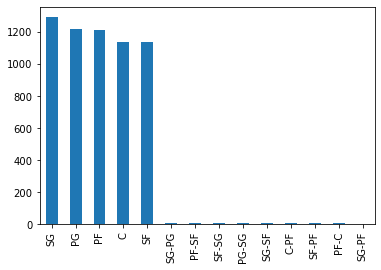

In [33]:
#position distribution
pd.value_counts(played_minutes['Pos']).plot.bar()

***My initial assumption*** was that we would have five unique values (PG, SG, SF, PF, C). However, there are players that play multiple roles consistently throughout the season. Given this, I'm going to add a class for whether it is a frontcourt or backcourt player. There is still the issue of intersections as we have players in the SF-SG and SG-PF bars.

**Decision so far** Add the FC/BC classification, and consider adding both depending on how many players (and how impactful those players are) tinker in both sides.